# Integration of Geomappy into Rioxarray

In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
import pyproj
import cartopy.crs as ccrs
from rasterio.enums import Resampling

In [2]:
os.chdir("../../../")

A 2D raster of water table depth (Fan et al., 2017).

In [3]:
r1 = rxr.open_rasterio("data/wtd.tif", masked=True)

Monthly mean discharges from 2019 from GloFAS

In [4]:
r2 = rxr.open_rasterio("data/dis_2019_monthlymeans_cropped_complete.nc", masked=True, decode_times=False).dis24[0]
r2 = r2.rio.write_crs(ccrs.epsg(3035))

/Users/jroebroek/opt/anaconda3/envs/geomappy/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/jroebroek/opt/anaconda3/envs/geomappy/lib/python3.9/site-packages/rioxarray/_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


## Outline on a world map

The first file covers Australia, while the second file covers Europe. Both have different projections. To see this at work, geomappy integrates two functions to explore the data: ``plot_world`` and ``plot_file``.

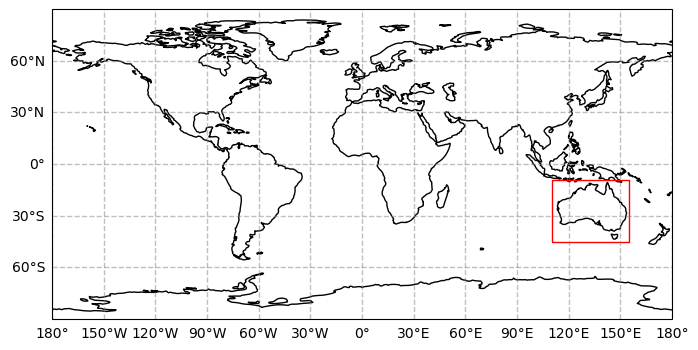

In [5]:
r1.plot_world(figsize=(8, 8))
plt.show()

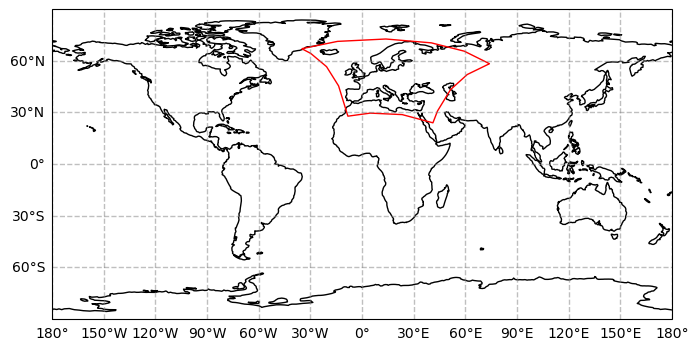

In [6]:
r2.plot_world(figsize=(8, 8))
plt.show()

Here you can see that different data projections cause different shapes.

To focus specifically on the area of the file itself geomappy integrates the ``plot_file`` function, using the projection of the data.

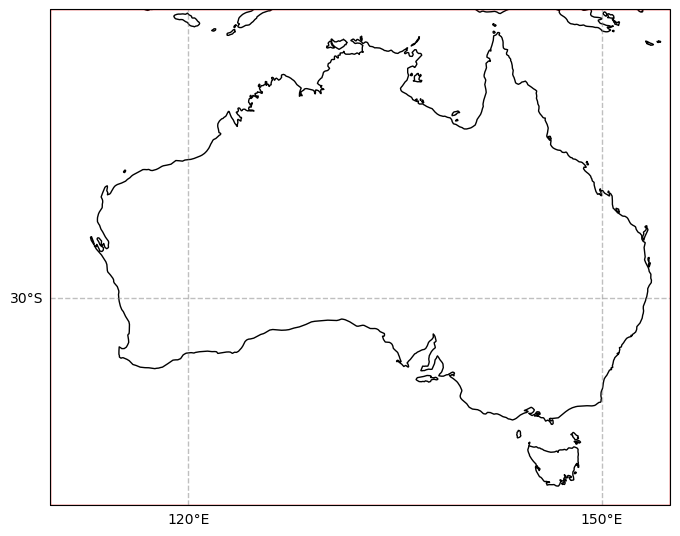

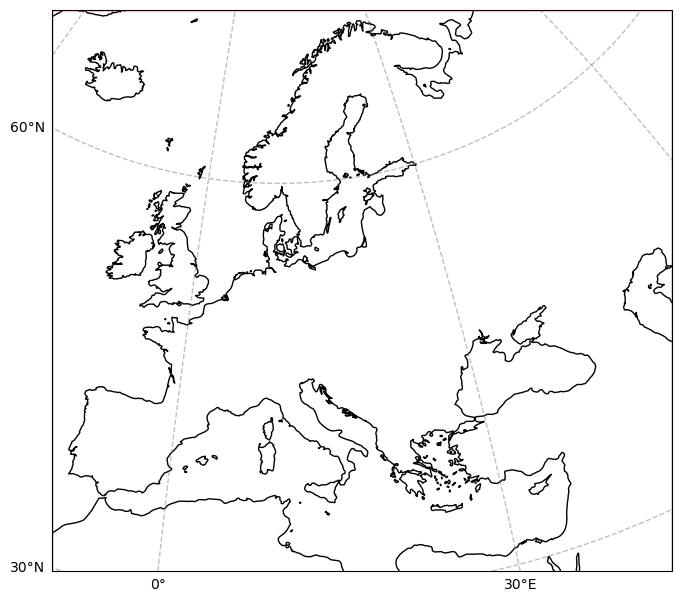

In [7]:
r1.plot_file()
r2.plot_file()
plt.show()

## Plotting the data

The geomappy plotting functionality (``plot_raster``) is directly integrated into rioxarray by loading geomappy. This results in the same figure as seen before:

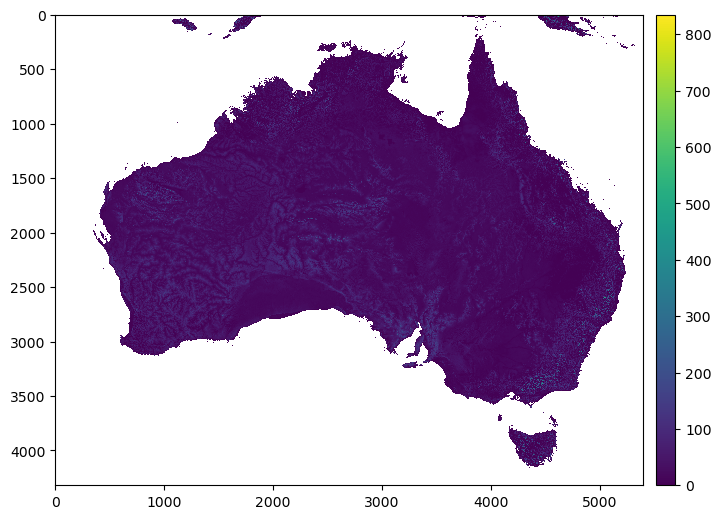

In [8]:
r1.plot_raster(basemap=False)
plt.show()

Including legends, bins and a cmap:

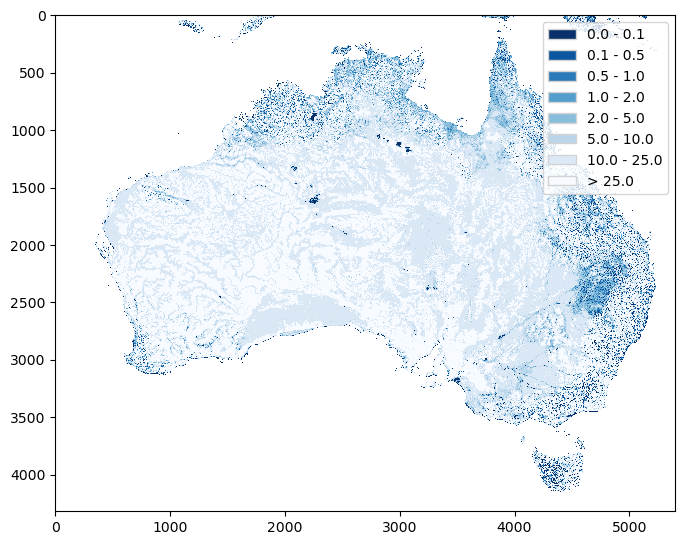

In [9]:
r1.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], legend="legend", cmap="Blues_r", basemap=False)
plt.show()

Plotting the same image on a basemap from within the DataArray is much easier though, by taking advantage of the internal projection representation.

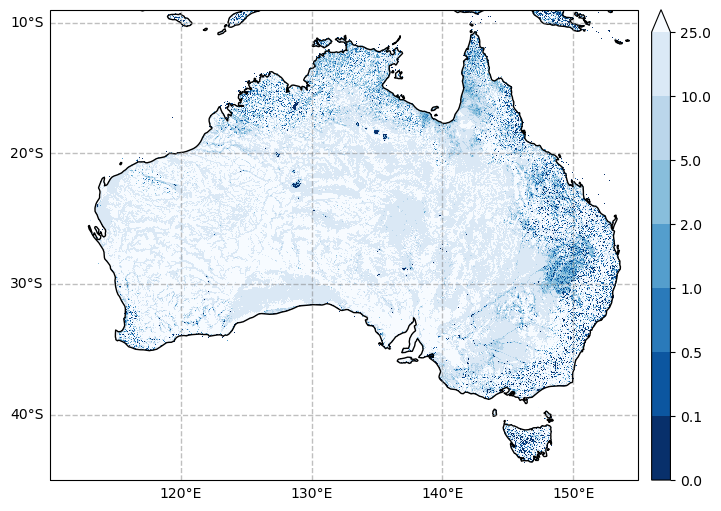

In [10]:
r1.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], cmap="Blues_r", basemap=True, ticks=10, lines=10)
plt.show()

## Plotting on different projections

plotting on different projections is done with the projection keyword (if basemap is activated)

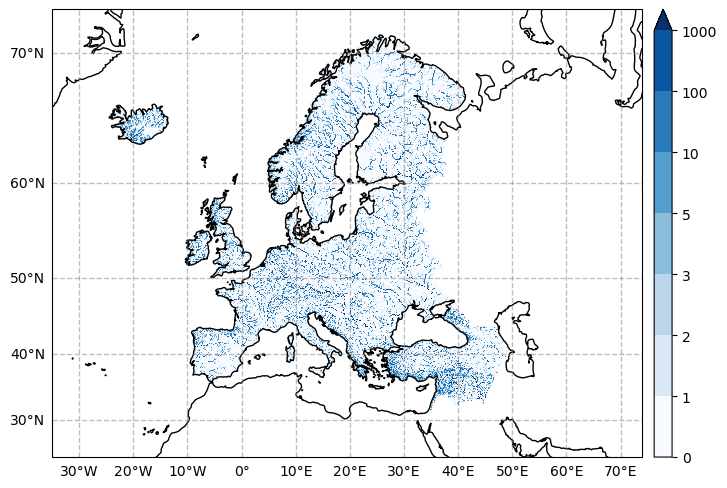

In [11]:
r2.rio.reproject(dst_crs=ccrs.Mercator()).plot_raster(bins=[0,1,2,3,5,10,100,1000], cmap="Blues", ticks=10, lines=10)
plt.show()